# Project: Investigate a Dataset - Appointment Defaulting Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset pulled from [kaggle.com](https://www.kaggle.com/joniarroba/noshowappointments) collects information from 110,527 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Considering the 'no_show' column as the dependent variable, the 'appointment_id' and 'patient_id' as identifiers, the other columns list out the attributes of each one of the patients. The attributes are listed and discussed below:

- 'gender': the distribution for gender in the data set is binary. The patients were either male or female
- 'scheduled_day': supplies information about the date patients set up their appointment
- 'appointment_day': this tells about the date in which the patients were billed for the appointment.
- 'age': this gives information about the age of each one of the patients
- 'neighbourhood': this indicates the location of the hospital
- 'scholarship': this indicates whether the patient is enrolled in the Brasilian welfare program, __Bolsa Familia__
- 'hypertension': this states whether the patient has hypertension or not
- 'diabetes':  this states whether the patient has hypertension or not
- 'alcoholism':  this states whether the patient is an alcoholic or not
- 'handicap': this states the number of disability each one of the patients had
- 'sms_received': states whether the patients received reminders or not
- 'no_show': this column tells whether the patient came for the appointment or not. 'yes' means they did not show up,
        while 'no' means they actually did show up.
       

### Questions for Analysis
**1.** What are the attributes of patients who showed up for their scheduled appointment?

**2.** What are the attributes of patients who did not show up for their scheduled appointment?



In [7]:
#importing the libraries needed for the task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [6]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In [8]:
#reading the .csv file into a data frame
df = pd.read_csv('no_show_appointments.csv')

In [9]:
#displaying the first few rows in the dataframe
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [10]:
#to determine the dimension of the dataset- the numbers of columns and rows
df.shape

(110527, 14)

In [11]:
#this is to check for missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset looks pretty okay, no missing data, just a few columns with the wrong datatype.

In [12]:
#Fetching the summary statistics of the dataset
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

From the output displayed above, there seems to be a problem with the Age dataset. The minimum value for the age dataset is negative. This is likely to be an error, as such errors are not uncommon, it may be due to incorrect data-entry; fat fingers or the malfunctioning of the keyboard used for the data entry. The 'handcap' dataset too needs some looking into, and this will be done shortly.

In [15]:
df['handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

The 'handcap' is actually okay too, upon further consideration. While I expected the distribution to be binary, it appears that the figures indicate the numbers of disability the patient has. 

In [13]:
#checking for the number of duplicates
sum(df.duplicated())

0

As earlier noted, the dataset looks pretty good. There are no duplicates found in the dataset

### Data Cleaning

First, I shall rename the columns to avoid any form of confusion when calling them or working with them. I will make the formatting consistent

In [14]:
df.rename(columns = lambda x: x.lower().replace('-', '_'), inplace = True)
df.head()

patientid  appointmentid gender          scheduledday  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         appointmentday  age      neighbourhood  scholarship  hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   diabetes  alcoholism  handcap  sms_received no_show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [16]:
#reformatting column names for consistency
df.rename(columns= {'patientid':'patient_id', 'appointmentid':'appointment_id', 'scheduledday':'schedule_day',
                   'appointmentday':'appointment_day', 'hipertension':'hypertension'}, inplace = True)

In [17]:
df.dtypes

patient_id         float64
appointment_id       int64
gender              object
schedule_day        object
appointment_day     object
age                  int64
neighbourhood       object
scholarship          int64
hypertension         int64
diabetes             int64
alcoholism           int64
handcap              int64
sms_received         int64
no_show             object
dtype: object

The datatype for the 'patient_id' column is unexpectedly a float datatype, this shall be converted to an integer datatype which I consider ideal.

>I shall also check for the specific datatypes of those columns whose datatype is simply described as 'object'

In [18]:
#Checking for the specific data types

col_type = ['gender', 'schedule_day', 'appointment_day', 'neighbourhood', 'no_show']

for c in col_type:
    print(type(df[c][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


The datatype for the 'scheduled_day' and 'appointment_day' will also be modified. This is to allow for easily manipulation of the data. It appears there is a default time for the 'appointment_day' of '00:00:00'. As such, the time component of both the 'scheduled_day' and 'appointment_day' may not exactly be characteristic in the analysis. As earlier pointed out, the age column contains an outlier (-1) which will be dropped.

In [19]:
#dropping the data row with age value = '-1'
df.drop(df[df['age'] < 0].count(), inplace=True)

In [20]:
#confirming if the row was dropped
df.shape

(110526, 14)

In [21]:
#converting both the "schedule_day" and "appointment_day" datatypes to a datetime datatype
split_dates = ['schedule_day','appointment_day']

for c in split_dates:
    df[c] = pd.to_datetime(df[c])    

In [22]:
df.head(50)

patient_id  appointment_id gender              schedule_day  \
0   2.987250e+13         5642903      F 2016-04-29 18:38:08+00:00   
2   4.262962e+12         5642549      F 2016-04-29 16:19:04+00:00   
3   8.679512e+11         5642828      F 2016-04-29 17:29:31+00:00   
4   8.841186e+12         5642494      F 2016-04-29 16:07:23+00:00   
5   9.598513e+13         5626772      F 2016-04-27 08:36:51+00:00   
6   7.336882e+14         5630279      F 2016-04-27 15:05:12+00:00   
7   3.449833e+12         5630575      F 2016-04-27 15:39:58+00:00   
8   5.639473e+13         5638447      F 2016-04-29 08:02:16+00:00   
9   7.812456e+13         5629123      F 2016-04-27 12:48:25+00:00   
10  7.345362e+14         5630213      F 2016-04-27 14:58:11+00:00   
11  7.542951e+12         5620163      M 2016-04-26 08:44:12+00:00   
12  5.666548e+14         5634718      F 2016-04-28 11:33:51+00:00   
13  9.113946e+14         5636249      M 2016-04-28 14:52:07+00:00   
14  9.988472e+13         5633951      F 2016-04-28 10:06:24+00:00   
15  9.994839e+10         5620206      F 2016-04-26 08:47:27+00:00   
16  8.457439e+13         5633121      M 2016-04-28 08:51:47+00:00   
17  1.479497e+13         5633460      F 2016-04-28 09:28:57+00:00   
18  1.713538e+13         5621836      F 2016-04-26 10:54:18+00:00   
19  7.223289e+12         5640433      F 2016-04-29 10:43:14+00:00   
20  6.222575e+14         5626083      F 2016-04-27 07:51:14+00:00   
21  1.215484e+13         5628338      F 2016-04-27 10:50:45+00:00   
22  8.632298e+14         5616091      M 2016-04-25 13:29:16+00:00   
23  2.137540e+14         5634142      F 2016-04-28 10:27:05+00:00   
24  8.734858e+12         5641780      F 2016-04-29 14:19:19+00:00   
25  5.819370e+12         5624020      M 2016-04-26 15:04:17+00:00   
26  2.578785e+10         5641781      F 2016-04-29 14:19:42+00:00   
27  1.215484e+13         5628345      F 2016-04-27 10:51:45+00:00   
28  5.926172e+12         5642400      M 2016-04-29 15:48:02+00:00   
29  1.225776e+12         5642186      F 2016-04-29 15:16:29+00:00   
30  3.428156e+11         5628068      F 2016-04-27 10:24:52+00:00   
31  3.112849e+11         5628907      M 2016-04-27 12:07:14+00:00   
32  5.288356e+13         5637908      M 2016-04-29 07:30:27+00:00   
33  7.653517e+12         5616921      F 2016-04-25 15:01:04+00:00   
34  1.999976e+13         5637963      F 2016-04-29 07:34:30+00:00   
35  7.816264e+13         5637968      M 2016-04-29 07:34:42+00:00   
36  7.298459e+13         5637975      F 2016-04-29 07:35:19+00:00   
37  1.578132e+12         5637986      F 2016-04-29 07:35:56+00:00   
38  5.873316e+12         5609446      M 2016-04-20 15:54:18+00:00   
39  1.455623e+13         5639644      F 2016-04-29 09:21:13+00:00   
40  9.968684e+14         5635881      F 2016-04-28 14:14:16+00:00   
41  8.224325e+14         5633339      F 2016-04-28 09:20:36+00:00   
42  2.596543e+13         5632906      F 2016-04-28 08:34:54+00:00   
43  7.155896e+13         5641620      F 2016-04-29 14:02:16+00:00   
44  2.741649e+11         5635414      F 2016-04-28 13:27:27+00:00   
45  4.982379e+12         5635842      F 2016-04-28 14:11:24+00:00   
46  1.379437e+11         5615608      M 2016-04-25 12:44:36+00:00   
47  5.894585e+11         5633116      F 2016-04-28 08:51:26+00:00   
48  8.545415e+12         5618643      F 2016-04-26 07:19:49+00:00   
49  9.223559e+13         5534656      F 2016-03-31 17:11:17+00:00   
50  1.827172e+14         5534661      F 2016-03-31 17:12:45+00:00   

             appointment_day  age      neighbourhood  scholarship  \
0  2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
2  2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3  2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4  2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
5  2016-04-29 00:00:00+00:00   76          REPÚBLICA            0   
6  2016-04-29 00:00:00+00:00   23         GOIABEIRAS            0   
7  

In [23]:
#to determine the lag between the appointment date as requested by the patients and their schedule days

df['time_lag'] = df['appointment_day'] - df['schedule_day']

In [24]:
df['disease_condition'] = df['hypertension'] + df['diabetes'] + df['alcoholism']

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - What are the attributes of patients who Did not show up for their scheduled appointment?

In [25]:
#To start with, I'd love to create to dataframes, df0= patients who did not show up, df1 = patients who showed up, 
df0= df.query('no_show == "Yes"')
df1= df.query('no_show == "No"')

In [26]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 6 to 110516
Data columns (total 16 columns):
patient_id           22319 non-null float64
appointment_id       22319 non-null int64
gender               22319 non-null object
schedule_day         22319 non-null datetime64[ns, UTC]
appointment_day      22319 non-null datetime64[ns, UTC]
age                  22319 non-null int64
neighbourhood        22319 non-null object
scholarship          22319 non-null int64
hypertension         22319 non-null int64
diabetes             22319 non-null int64
alcoholism           22319 non-null int64
handcap              22319 non-null int64
sms_received         22319 non-null int64
no_show              22319 non-null object
time_lag             22319 non-null timedelta64[ns]
disease_condition    22319 non-null int64
dtypes: datetime64[ns, UTC](2), float64(1), int64(9), object(3), timedelta64[ns](1)
memory usage: 2.9+ MB


In [27]:
#cheking for the age distribution of patients who did not show up

plt.hist(df0['age'], edgecolor = 'black', alpha = 0.7, bins=[0,10,20,30,40,50,60,70,80,90,100,110] )
plt.title("Age Distribution of Patients Who Did Not Show up for Their Appointment")
plt.xlabel("Age Groups")
plt.ylabel("Count");

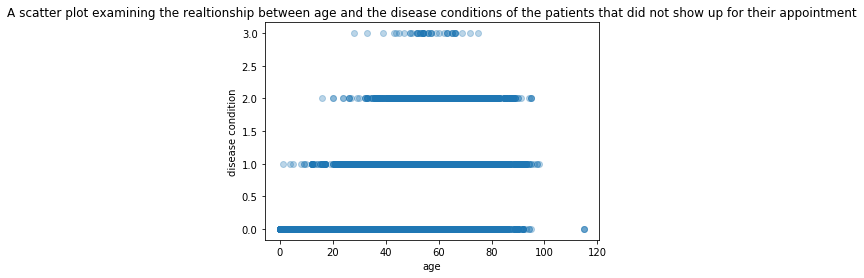

In [28]:
#Checking the relationship between age and number of disease conditions

plt.scatter(df0['age'], df0['disease_condition'],alpha=0.3)
plt.xlabel('age')
plt.ylabel('disease condition')
plt.title("A scatter plot examining the realtionship between age and the disease conditions of the patients that did not show up for their appointment");

In [29]:
#creating a function for visualization to avoid code repitition

def pie_plot(arg):
    arg.value_counts().plot.pie(figsize = (8,8));

In [30]:
#A visualization of the gender distribution of patients that did not show up for their appointment

pie_plot(df0['gender'])

In [31]:
#A visualization of the gender distribution. Values 0, 1, 2, 3 mean the patients have none, one, two or three of alcoholism,
#diabetes and hypertension.

pie_plot(df0['disease_condition'])

### Research Question 2  - What are the attributes of patients who showed up for their scheduled appointment?

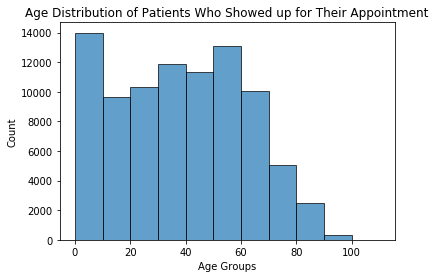

In [32]:
#cheking for the age distribution of patients who actually did show up

plt.hist(df1['age'], edgecolor = 'black', alpha = 0.7, bins=[0,10,20,30,40,50,60,70,80,90,100,110] )
plt.title("Age Distribution of Patients Who Showed up for Their Appointment")
plt.xlabel("Age Groups")
plt.ylabel("Count");

In [33]:
#A visualization of the gender distribution

pie_plot(df1['gender'])

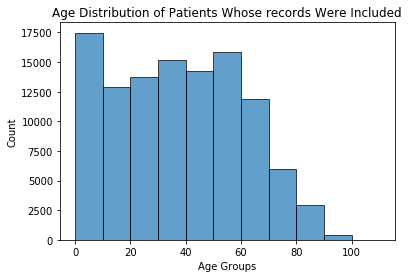

In [34]:
#Visualizing the complete dataset to check for similarities in the distribution.

plt.hist(df['age'], edgecolor = 'black', alpha = 0.7, bins=[0,10,20,30,40,50,60,70,80,90,100,110] )
plt.title("Age Distribution of Patients Whose records Were Included")
plt.xlabel("Age Groups")
plt.ylabel("Count");

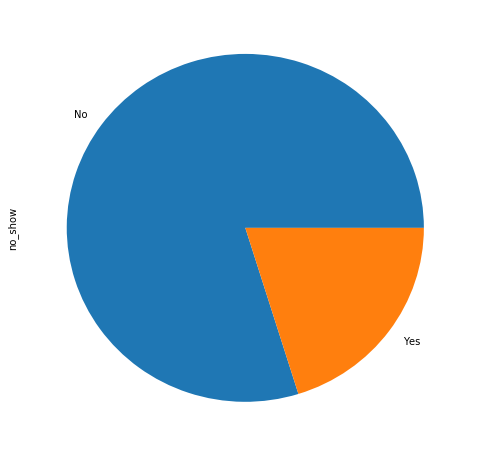

In [35]:
#Visualization of the distribution of the patients who showed up and those who did.
#It is pertinent to restate that no (the blue portion) actually means that the patients showed up.

pie_plot(df['no_show'])

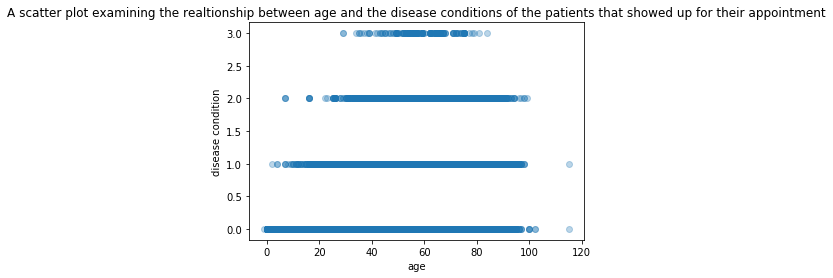

In [36]:
#Checking the relationship between age and number of disease conditions

plt.scatter(df1['age'], df1['disease_condition'],alpha=0.3)
plt.xlabel('age')
plt.ylabel('disease condition')
plt.title("A scatter plot examining the realtionship between age and the disease conditions of the patients that showed up for their appointment");

<a id='conclusions'></a>
## Conclusions

A larger proportion of the patients showed up for their appointment. The majority of the patients who showed up are female and half of these patients are aged 18 to 55. However, it may be impossible to draw any concrete statistical significance from this because it is exactly reflective of what is found in the total dataset. Any statistical work of significance will require sampling.

As seen in the "time_lag" column, a number of values were negative. The only logical explanation I could come up with about that is that some of the patients booked for an appointment days or hours after they were normally supposed to or that there is a problem with the dataset.

It is also shown in the scatter plots that being advanced in age increased the number of disease conditons the patients had. Those who had none of alcholism, diabetes and hypertension were younger than 20 years of age.

It is interesting to note that while the age distribution for the patients who did not show up for their appointment is more skewed to the right than those who did show up, there is similarity in the pattern of distribution. In both category of patients the highest proportion are patients aged between 0 and 10. This may be due to two reasons in my opinion:

    1. It is reflective of the age distribution in the general data set. As such, sampling will be very central to making a concrete statistical inference from the dataset. 
       
    2. That there is infact a problem with the dataset as the age value '0' makes up the most of the chunk of that dataset. Unfortunately there was no information of the reason why the patients booked the appointment to give one a justification for dropping the datasets with age value = 0
    

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0